## Planckian distribution of target photons

Numerical verification of Eq. (66) in Kelner & Aharonian (2009)

In [8]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e, m_p, e, h, c, k_B
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from IPython.display import Image

In [10]:
T_cmb = 2.7 * u.K
kBTcmb = (k_B*T_cmb).to(u.eV)

def Planckian_dist(eps): # Creating Planckian distribution
    f = np.pi**(-2) * (eps**2)/(np.e**(eps/kBTcmb) - 1)
    return f

def second_to_last(arr): # Function adding last element again, useful to get dimensions right
    arr = np.append(arr, arr[-1])
    return arr

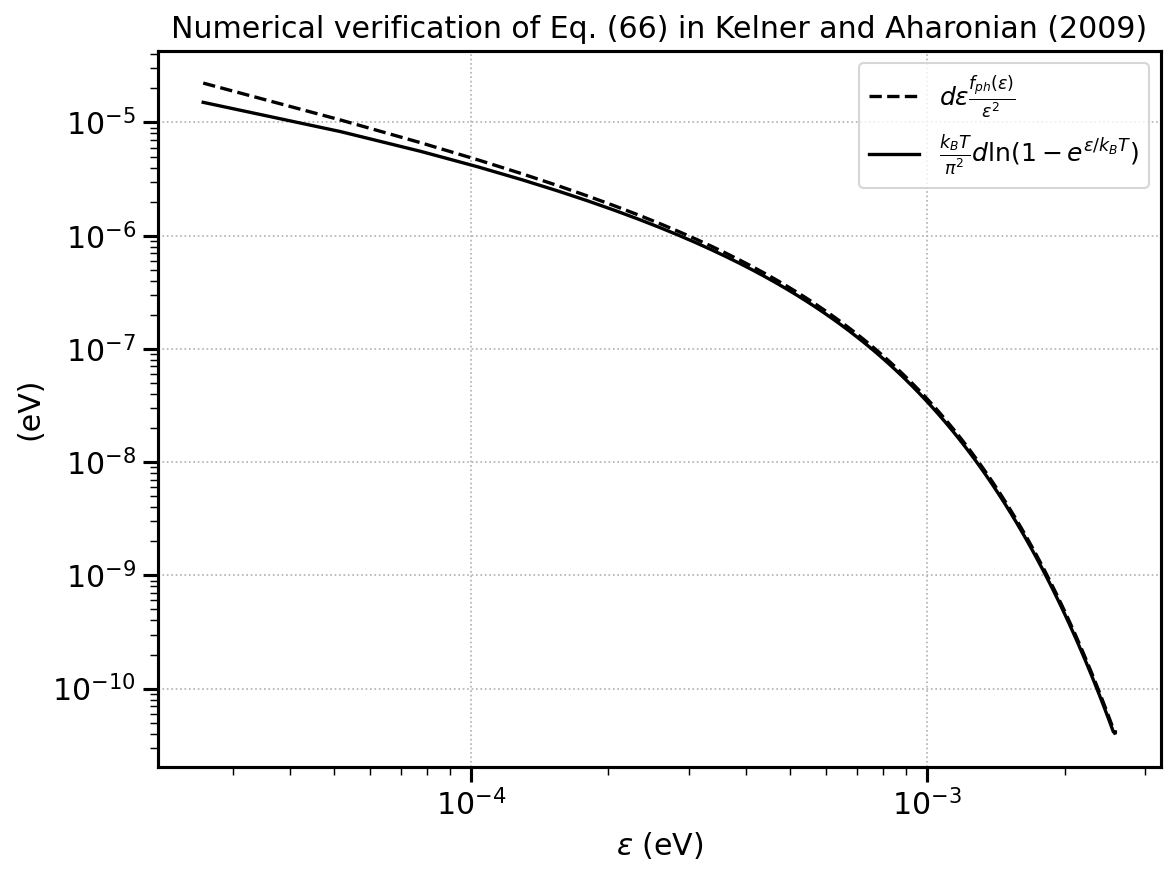

In [12]:
# Comparing Eq. (66) in Kelner and Aharonian (2009)

T_array = np.linspace(0.1, 10, 100) * u.K

eps_array = 3*k_B*T_array
eps_array = eps_array.to(u.eV)

# Left side of Eq. (66)

deps_array = second_to_last(eps_array[1::] - eps_array[0:-1])
f_ph = Planckian_dist(eps_array)
left_side = deps_array * f_ph * eps_array**-2

# Right side of Eq. (66)

log_array = np.log(1 - np.e**(-eps_array/kBTcmb))
dlog_array = second_to_last(log_array[1::] - log_array[0:-1])
right_side = (kBTcmb)/(np.pi**2) * dlog_array

# Comparison between the two sides

plt.loglog(eps_array, left_side, "k--", label=r"$d\epsilon \frac{f_{ph}(\epsilon)}{\epsilon^2}$")
plt.loglog(eps_array, right_side, "k", label=r"$\frac{k_BT}{\pi^2} d \ln(1-e^{\epsilon/k_BT})$")

plt.title("Numerical verification of Eq. (66) in Kelner and Aharonian (2009)")
plt.ylabel(fr"({right_side.unit})")
plt.xlabel(fr"$\epsilon$ ({eps_array.unit})")
plt.legend()
plt.show()

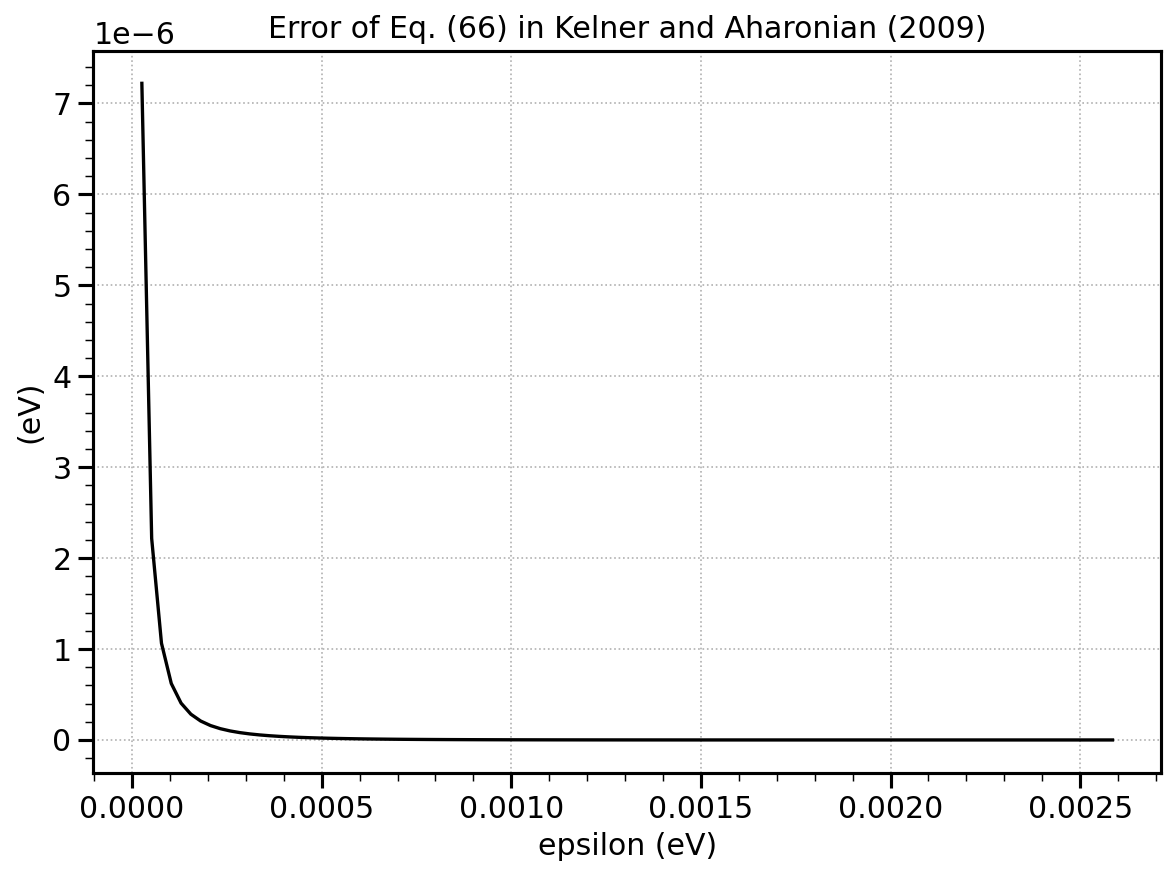

In [13]:
plt.plot(eps_array, abs(left_side-right_side), "k")
plt.title("Error of Eq. (66) in Kelner and Aharonian (2009)")
plt.ylabel(f"({right_side.unit})")
plt.xlabel(f"epsilon ({eps_array.unit})")
plt.show()